<a href="https://colab.research.google.com/github/Likelipop/PatReg/blob/main/LGBM_CTR_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/arashnic/ctr-in-advertisement

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/ctr-in-advertisement")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/ctr-in-advertisement/versions/1


In [ ]:
help(kagglehub.dataset_download)

Help on function dataset_download in module kagglehub.datasets:

dataset_download(handle: str, path: Optional[str] = None, *, force_download: Optional[bool] = False) -> str
    Download dataset files
    Args:
        handle: (string) the dataset handle
        path: (string) Optional path to a file within a dataset
        force_download: (bool) Optional flag to force download a dataset, even if it's cached
    Returns:
        A string requesting the path to the requested dataset files.



In [ ]:
!ls /root/.cache/kagglehub/datasets/arashnic/ctr-in-advertisement/versions/1

 Ad_Click_prediciton_test.csv  'Ad_click_prediction_train (1).csv'


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pdf0x_train = pd.read_csv("/root/.cache/kagglehub/datasets/arashnic/ctr-in-advertisement/versions/1/Ad_click_prediction_train (1).csv")
pdf0x_test = pd.read_csv("/root/.cache/kagglehub/datasets/arashnic/ctr-in-advertisement/versions/1/Ad_Click_prediciton_test.csv")

# Data basic info

In [ ]:
pdf0x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [ ]:
pdf0x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128858 entries, 0 to 128857
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              128858 non-null  int64  
 1   DateTime                128858 non-null  object 
 2   user_id                 128858 non-null  int64  
 3   product                 128858 non-null  object 
 4   campaign_id             128858 non-null  int64  
 5   webpage_id              128858 non-null  int64  
 6   product_category_1      128858 non-null  int64  
 7   product_category_2      52687 non-null   float64
 8   user_group_id           123174 non-null  float64
 9   gender                  123174 non-null  object 
 10  age_level               123174 non-null  float64
 11  user_depth              123174 non-null  float64
 12  city_development_index  94249 non-null   float64
 13  var_1                   128858 non-null  int64  
dtypes: float64(5), int64

In [ ]:
pdf0x_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [ ]:
pdf0x_train['product_category_1'].unique()

array([4, 5, 3, 2, 1])

In [ ]:
pdf0x_train['product_category_2'].unique()

array([    nan, 270915., 146115., 254132., 372532., 450184.,  18595.,
       255689., 408790., 202351., 408831.,  32026., 235358., 143597.,
       234846., 301147.,  99226., 419804., 269093., 270147., 181650.,
        66101., 419304., 300711., 447834.,  82527., 327439., 381435.,
       168114., 247789.])

In [ ]:
pdf0x_train['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
pdf0x_train['age_level'].unique()

array([ 4.,  2.,  3.,  1., nan,  5.,  6.,  0.])

In [ ]:
pdf0x_train["user_depth"].mean()

2.8784153619384876

In [ ]:
pdf0x_train["product"].unique()

array(['C', 'I', 'F', 'H', 'B', 'D', 'G', 'E', 'J', 'A'], dtype=object)

In [ ]:
pdf0x_test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


# CTR overall

In [ ]:
pdf0x_train.is_click.mean()

0.06762704218299082

In [ ]:
pdf0x_train["date"] = pd.to_datetime(pdf0x_train["DateTime"]).dt.date

In [ ]:
pdf0x_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,date
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,2017-07-02
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,2017-07-02
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,2017-07-02
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,2017-07-02
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,2017-07-02


In [ ]:
pdf0x_train.DateTime.max()

'2017-07-07 23:59'

In [ ]:
pdf0x_train.DateTime.min()

'2017-07-02 00:00'

# CTR daily

In [ ]:
daily_clks = pdf0x_train.groupby('date')['is_click'].apply(lambda x: (x==1).sum()).reset_index(name='sum_clicks')
daily_imprs = pdf0x_train.groupby('date')['is_click'].apply(lambda x: (x==0).sum()).reset_index(name='sum_impressions')

In [ ]:
daily_ctr = pd.merge(daily_clks, daily_imprs, how="inner", on=["date"])

In [ ]:
daily_ctr["avg_ctr"] = daily_ctr["sum_clicks"]/daily_ctr["sum_impressions"]

In [ ]:
daily_ctr

,date,sum_clicks,sum_impressions,avg_ctr
0,2017-07-02,5791,73254,0.079054
1,2017-07-03,6098,75282,0.081002
2,2017-07-04,5327,67758,0.078618
3,2017-07-05,4903,75886,0.064610
4,2017-07-06,4811,72715,0.066162
5,2017-07-07,4401,67065,0.065623


# Feature Engineering

## User daily features


In [ ]:
user_daily_clks = pdf0x_train.groupby(['user_id', 'date'])['is_click'].apply(lambda x: (x==1).sum()).reset_index(name='user_sum_clicks')
user_daily_imprs = pdf0x_train.groupby(['user_id', 'date'])['is_click'].apply(lambda x: (x==0).sum()).reset_index(name='user_sum_impressions')

In [ ]:
user_daily_ctr = pd.merge(user_daily_clks, user_daily_imprs, how="inner", on=["user_id", "date"])

In [ ]:
user_daily_ctr["user_avg_ctr"] = user_daily_ctr["user_sum_clicks"].divide(user_daily_ctr["user_sum_impressions"],)

In [ ]:
user_daily_ctr

,user_id,date,user_sum_clicks,user_sum_impressions,user_avg_ctr
0,4,2017-07-02,0,1,0.0
1,6,2017-07-06,0,1,0.0
2,19,2017-07-02,0,1,0.0
3,19,2017-07-05,0,1,0.0
4,25,2017-07-03,0,2,0.0
...,...,...,...,...,...
249620,1141718,2017-07-03,0,1,0.0
249621,1141718,2017-07-06,1,1,1.0
249622,1141723,2017-07-04,1,0,inf
249623,1141723,2017-07-05,0,2,0.0


In [ ]:
user_daily_ctr.describe()

,user_id,user_sum_clicks,user_sum_impressions,user_avg_ctr
count,2.496250e+05,249625.000000,249625.000000,249625.0
mean,5.467695e+05,0.125512,1.730436,inf
std,3.299764e+05,0.370157,2.080645,NaN
min,4.000000e+00,0.000000,0.000000,0.0
25%,2.556400e+05,0.000000,1.000000,0.0
50%,5.345570e+05,0.000000,1.000000,0.0
75%,8.294460e+05,0.000000,2.000000,0.0
max,1.141729e+06,10.000000,74.000000,inf


In [ ]:
def describe_percentiles(df, percentiles=None, fmt=".2f"):
    """
    Describe custom percentiles for all numeric columns in a DataFrame,
    including NaN count, skewness, and kurtosis for each column.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        percentiles (list, optional): List of percentiles to calculate.
            Default is [0.01, 0.05, 0.1, 0.2, ..., 0.9, 0.95, 0.99].
        fmt (str, optional): Format for output values. Default is ".2f".

    Returns:
        pd.DataFrame: DataFrame with descriptive statistics for all numeric columns.
    """
    if percentiles is None:
        percentiles = [0.01, 0.05] + [i * 0.1 for i in range(1, 10)] + [0.95, 0.99]

    all_stats = []

    # Loop over each numeric column
    for col in df.select_dtypes(include="number").columns:
        col_data = pd.to_numeric(df[col], errors='coerce')
        desc_stats = col_data.describe(percentiles=percentiles).to_frame(name=col)

        # Add custom statistics
        desc_stats.loc["nan"] = col_data.isnull().mean()
        desc_stats.loc["skew"] = col_data.skew()
        desc_stats.loc["kurt"] = col_data.kurtosis()

        # Formatting index for percentiles
        desc_stats = desc_stats.rename(index=lambda x: f"{int(float(x) * 100)}%" if isinstance(x, float) else x)
        desc_stats = desc_stats.reindex(
            ["count", "nan", "mean", "std", "skew", "kurt", "min"] +
            [f"{int(p * 100)}%" for p in sorted(percentiles)] +
            ["max"]
        )

        # Format values if requested
        if fmt:
            desc_stats[col] = desc_stats[col].map(lambda x: f"{x:{fmt}}" if pd.notnull(x) else x)

        all_stats.append(desc_stats)

    # Concatenate all column statistics into one DataFrame
    result = pd.concat(all_stats, axis=1)
    return result

In [ ]:
describe_percentiles(user_daily_ctr.drop(columns=["user_id", "date"]))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,user_sum_clicks,user_sum_impressions,user_avg_ctr
count,249625.00,249625.00,249625.00
nan,0.00,0.00,0.00
mean,0.13,1.73,inf
std,0.37,2.08,NaN
skew,3.50,6.79,NaN
kurt,18.99,89.97,NaN
min,0.00,0.00,0.00
1%,0.00,0.00,0.00
5%,0.00,0.00,0.00
10%,0.00,1.00,0.00


In [ ]:
user_daily_ctr = user_daily_ctr.sort_values(by=['user_id', 'date']).reset_index(drop=True)

# Rolling impressions
user_daily_ctr['user_sum_impressions_d01'] = user_daily_ctr.groupby('user_id')['user_sum_impressions'].shift(1).rolling(1).sum()
user_daily_ctr['user_sum_impressions_d03'] = user_daily_ctr.groupby('user_id')['user_sum_impressions'].shift(1).rolling(3, min_periods=1).sum()
user_daily_ctr['user_sum_impressions_d05'] = user_daily_ctr.groupby('user_id')['user_sum_impressions'].shift(1).rolling(5, min_periods=1).sum()

# Rolling clicks
user_daily_ctr['user_sum_clicks_d01'] = user_daily_ctr.groupby('user_id')['user_sum_clicks'].shift(1).rolling(1).sum()
user_daily_ctr['user_sum_clicks_d03'] = user_daily_ctr.groupby('user_id')['user_sum_clicks'].shift(1).rolling(3, min_periods=1).sum()
user_daily_ctr['user_sum_clicks_d05'] = user_daily_ctr.groupby('user_id')['user_sum_clicks'].shift(1).rolling(5, min_periods=1).sum()

user_daily_ctr["user_avg_ctr_d01"] = user_daily_ctr['user_sum_clicks_d01'] / user_daily_ctr['user_sum_impresssions_d01']
user_daily_ctr["user_avg_ctr_d03"] = user_daily_ctr['user_sum_clicks_d03'] / user_daily_ctr['user_sum_impresssions_d03']
user_daily_ctr["user_avg_ctr_d05"] = user_daily_ctr['user_sum_clicks_d05'] / user_daily_ctr['user_sum_impresssions_d05']

In [ ]:
user_daily_ctr

,user_id,date,user_sum_clicks,user_sum_impressions,user_avg_ctr,user_sum_impressions_d01,user_sum_impressions_d03,user_sum_impressions_d05,user_sum_clicks_d01,user_sum_clicks_d03,user_sum_clicks_d05
0,4,2017-07-02,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-07-06,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,19,2017-07-02,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,19,2017-07-05,0,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,25,2017-07-03,0,2,0.0,NaN,1.0,1.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
249620,1141718,2017-07-03,0,1,0.0,0.0,2.0,2.0,1.0,1.0,2.0
249621,1141718,2017-07-06,1,1,1.0,1.0,1.0,3.0,0.0,1.0,1.0
249622,1141723,2017-07-04,1,0,inf,NaN,1.0,3.0,NaN,1.0,1.0
249623,1141723,2017-07-05,0,2,0.0,0.0,1.0,1.0,1.0,1.0,2.0


In [ ]:
pdf0x_train['product_category_1'].unique()

array([4, 5, 3, 2, 1])

In [ ]:
# user_daily_product_category_1_1 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==1) & (x['is_click']==1)).sum()).reset_index(name='sum_product_category_1_1_clicks')
# user_daily_product_category_1_2 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==2) & (x['is_click']==1)).sum()).reset_index(name='sum_product_category_1_2_clicks')
# user_daily_product_category_1_3 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==3) & (x['is_click']==1)).sum()).reset_index(name='sum_product_category_1_3_clicks')
# user_daily_product_category_1_4 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==4) & (x['is_click']==1)).sum()).reset_index(name='sum_product_category_1_4_clicks')
# user_daily_product_category_1_5 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==5) & (x['is_click']==1)).sum()).reset_index(name='sum_product_category_1_5_clicks')

In [ ]:
# user_daily_product_category_1_1 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==1) & (x['is_click']==0)).sum()).reset_index(name='sum_product_category_1_1_impressions')
# user_daily_product_category_1_2 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==2) & (x['is_click']==0)).sum()).reset_index(name='sum_product_category_1_2_impressions')
# user_daily_product_category_1_3 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==3) & (x['is_click']==0)).sum()).reset_index(name='sum_product_category_1_3_impressions')
# user_daily_product_category_1_4 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==4) & (x['is_click']==0)).sum()).reset_index(name='sum_product_category_1_4_impressions')
# user_daily_product_category_1_5 = pdf0x_train.groupby(['user_id', 'date']).apply(lambda x: ((x['product_category_1']==5) & (x['is_click']==0)).sum()).reset_index(name='sum_product_category_1_5_impressions')

In [ ]:
# Create a crosstab of counts for each product category and whether it's not clicked
crosstab = pd.crosstab(
    [pdf0x_train['user_id'], pdf0x_train['date']],
    pdf0x_train['product_category_1'],
    pdf0x_train['is_click'] == 0,
    aggfunc='sum'
)

# Rename columns to match the original output naming pattern
crosstab.columns = [f'user_sum_product_category_1_{col}_impressions' for col in crosstab.columns]

# Reset index to get 'user_id' and 'date' back as columns
user_daily_product_category_1_imprs = crosstab.reset_index()

In [ ]:
# Create a crosstab of counts for each product category and whether it's not clicked
crosstab = pd.crosstab(
    [pdf0x_train['user_id'], pdf0x_train['date']],
    pdf0x_train['product_category_1'],
    pdf0x_train['is_click'] == 1,
    aggfunc='sum'
)

# Rename columns to match the original output naming pattern
crosstab.columns = [f'user_sum_product_category_1_{col}_clicks' for col in crosstab.columns]

# Reset index to get 'user_id' and 'date' back as columns
user_daily_product_category_1_clks = crosstab.reset_index()

In [ ]:
user_daily_product_category_1 = pd.merge(user_daily_product_category_1_clks, user_daily_product_category_1_imprs, how="outer", on=["user_id", "date"])

In [ ]:
user_daily_product_category_1

,user_id,date,user_sum_product_category_1_1_clicks,user_sum_product_category_1_2_clicks,user_sum_product_category_1_3_clicks,user_sum_product_category_1_4_clicks,user_sum_product_category_1_5_clicks,user_sum_product_category_1_1_impressions,user_sum_product_category_1_2_impressions,user_sum_product_category_1_3_impressions,user_sum_product_category_1_4_impressions,user_sum_product_category_1_5_impressions
0,4,2017-07-02,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,6,2017-07-06,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,19,2017-07-02,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,19,2017-07-05,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,25,2017-07-03,NaN,0.0,NaN,0.0,NaN,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
249620,1141718,2017-07-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
249621,1141718,2017-07-06,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
249622,1141723,2017-07-04,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
249623,1141723,2017-07-05,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,1.0


In [ ]:
# Create a crosstab of counts for each product category and whether it's not clicked
crosstab = pd.crosstab(
    [pdf0x_train['user_id'], pdf0x_train['date']],
    pdf0x_train['product'],
    pdf0x_train['is_click'] == 1,
    aggfunc='sum'
)

# Rename columns to match the original output naming pattern
crosstab.columns = [f'user_sum_product_{col}_clicks' for col in crosstab.columns]

# Reset index to get 'user_id' and 'date' back as columns
user_daily_product_clks = crosstab.reset_index()

In [ ]:
# Create a crosstab of counts for each product category and whether it's not clicked
crosstab = pd.crosstab(
    [pdf0x_train['user_id'], pdf0x_train['date']],
    pdf0x_train['product'],
    pdf0x_train['is_click'] == 0,
    aggfunc='sum'
)

# Rename columns to match the original output naming pattern
crosstab.columns = [f'user_sum_product_{col}_impressions' for col in crosstab.columns]

# Reset index to get 'user_id' and 'date' back as columns
user_daily_product_imprs = crosstab.reset_index()

In [ ]:
user_daily_product = pd.merge(user_daily_product_clks, user_daily_product_imprs, how="outer", on=["user_id", "date"])

In [ ]:
user_daily_product

,user_id,date,user_sum_product_A_clicks,user_sum_product_B_clicks,user_sum_product_C_clicks,user_sum_product_D_clicks,user_sum_product_E_clicks,user_sum_product_F_clicks,user_sum_product_G_clicks,user_sum_product_H_clicks,...,user_sum_product_A_impressions,user_sum_product_B_impressions,user_sum_product_C_impressions,user_sum_product_D_impressions,user_sum_product_E_impressions,user_sum_product_F_impressions,user_sum_product_G_impressions,user_sum_product_H_impressions,user_sum_product_I_impressions,user_sum_product_J_impressions
0,4,2017-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,6,2017-07-06,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,2017-07-02,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,19,2017-07-05,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,25,2017-07-03,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249620,1141718,2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
249621,1141718,2017-07-06,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
249622,1141723,2017-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
249623,1141723,2017-07-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


## Campaign daily features

In [ ]:
pdf0x_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,date
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,2017-07-02
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,2017-07-02
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,2017-07-02
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,2017-07-02
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,2017-07-02


In [ ]:
campaign_daily_clks = pdf0x_train.groupby(['campaign_id', 'date'])['is_click'].apply(lambda x: (x==1).sum()).reset_index(name='campaign_sum_clicks')
campaign_daily_imprs = pdf0x_train.groupby(['campaign_id', 'date'])['is_click'].apply(lambda x: (x==0).sum()).reset_index(name='campaign_sum_impressions')

campaign_daily_ctr = pd.merge(campaign_daily_clks, campaign_daily_imprs, how="inner", on=["campaign_id", "date"])
campaign_daily_ctr["campaign_avg_ctr"] = campaign_daily_ctr["campaign_sum_clicks"].divide(campaign_daily_ctr["campaign_sum_impressions"])

In [ ]:
campaign_daily_ctr.head()

,campaign_id,date,campaign_sum_clicks,campaign_sum_impressions,campaign_avg_ctr
0,82320,2017-07-02,384,6168,0.062257
1,82320,2017-07-03,260,3920,0.066327
2,82320,2017-07-04,257,3933,0.065345
3,82320,2017-07-05,268,4388,0.061076
4,82320,2017-07-06,355,4010,0.088529


In [ ]:
campaign_daily_ctr = campaign_daily_ctr.sort_values(by=['campaign_id', 'date']).reset_index(drop=True)

# Rolling impressions
campaign_daily_ctr['campaign_sum_impressions_d01'] = campaign_daily_ctr.groupby('campaign_id')['campaign_sum_impressions'].shift(1).rolling(1).sum()
campaign_daily_ctr['campaign_sum_impressions_d03'] = campaign_daily_ctr.groupby('campaign_id')['campaign_sum_impressions'].shift(1).rolling(3, min_periods=1).sum()
campaign_daily_ctr['campaign_sum_impressions_d05'] = campaign_daily_ctr.groupby('campaign_id')['campaign_sum_impressions'].shift(1).rolling(5, min_periods=1).sum()

# Rolling clicks
campaign_daily_ctr['campaign_sum_clicks_d01'] = campaign_daily_ctr.groupby('campaign_id')['campaign_sum_clicks'].shift(1).rolling(1).sum()
campaign_daily_ctr['campaign_sum_clicks_d03'] = campaign_daily_ctr.groupby('campaign_id')['campaign_sum_clicks'].shift(1).rolling(3, min_periods=1).sum()
campaign_daily_ctr['campaign_sum_clicks_d05'] = campaign_daily_ctr.groupby('campaign_id')['campaign_sum_clicks'].shift(1).rolling(5, min_periods=1).sum()

# Rolling ctr
campaign_daily_ctr['campaign_avg_ctr_d01'] = campaign_daily_ctr['campaign_sum_clicks_d01'] / campaign_daily_ctr['campaign_sum_impressions_d01']
campaign_daily_ctr['campaign_avg_ctr_d03'] = campaign_daily_ctr['campaign_sum_clicks_d03'] / campaign_daily_ctr['campaign_sum_impressions_d03']
campaign_daily_ctr['campaign_avg_ctr_d05'] = campaign_daily_ctr['campaign_sum_clicks_d05'] / campaign_daily_ctr['campaign_sum_impressions_d05']

In [ ]:
campaign_daily_ctr.head()

,campaign_id,date,campaign_sum_clicks,campaign_sum_impressions,campaign_avg_ctr,campaign_sum_impressions_d01,campaign_sum_impressions_d03,campaign_sum_impressions_d05,campaign_sum_clicks_d01,campaign_sum_clicks_d03,campaign_sum_clicks_d05
0,82320,2017-07-02,384,6168,0.062257,NaN,NaN,NaN,NaN,NaN,NaN
1,82320,2017-07-03,260,3920,0.066327,6168.0,6168.0,6168.0,384.0,384.0,384.0
2,82320,2017-07-04,257,3933,0.065345,3920.0,10088.0,10088.0,260.0,644.0,644.0
3,82320,2017-07-05,268,4388,0.061076,3933.0,14021.0,14021.0,257.0,901.0,901.0
4,82320,2017-07-06,355,4010,0.088529,4388.0,12241.0,18409.0,268.0,785.0,1169.0


In [ ]:
campaign_daily_age_stats = pdf0x_train.groupby(['campaign_id', 'date']).agg(
    campaign_age_level_mean=('age_level', 'mean'),
    campaign_age_level_max=('age_level', 'max'),
    campaign_age_level_min=('age_level', 'min')
).reset_index()

In [ ]:
campaign_daily_age_stats.head()

,campaign_id,date,campaign_age_level_mean,campaign_age_level_max,campaign_age_level_min
0,82320,2017-07-02,2.528722,6.0,0.0
1,82320,2017-07-03,2.456258,6.0,0.0
2,82320,2017-07-04,2.434629,6.0,0.0
3,82320,2017-07-05,2.373306,6.0,0.0
4,82320,2017-07-06,2.389202,6.0,0.0


In [ ]:
# Create a crosstab of counts for each gender category and whether it's not clicked
crosstab = pd.crosstab(
    [pdf0x_train['campaign_id'], pdf0x_train['date']],
    pdf0x_train['gender'],
    pdf0x_train['is_click'] == 1,
    aggfunc='sum'
)

# Rename columns to match the original output naming pattern
crosstab.columns = [f'campaign_sum_gender_{col}_clicks' for col in crosstab.columns]

# Reset index to get 'campaign_id' and 'date' back as columns
campaign_daily_gender_clks = crosstab.reset_index()


# Create a crosstab of counts for each gender category and whether it's not clicked
crosstab = pd.crosstab(
    [pdf0x_train['campaign_id'], pdf0x_train['date']],
    pdf0x_train['gender'],
    pdf0x_train['is_click'] == 0,
    aggfunc='sum'
)

# Rename columns to match the original output naming pattern
crosstab.columns = [f'campaign_sum_gender_{col}_impressions' for col in crosstab.columns]

# Reset index to get 'campaign_id' and 'date' back as columns
campaign_daily_gender_imprs = crosstab.reset_index()

In [ ]:
campaign_daily_gender_ctr = pd.merge(campaign_daily_gender_clks, campaign_daily_gender_imprs, how="inner", on=["campaign_id", "date"])

In [ ]:
campaign_daily_gender_ctr["campaign_avg_gender_Female_ctr"] = campaign_daily_gender_ctr["campaign_sum_gender_Female_clicks"] / campaign_daily_gender_ctr["campaign_sum_gender_Female_impressions"]
campaign_daily_gender_ctr["campaign_avg_gender_Male_ctr"] = campaign_daily_gender_ctr["campaign_sum_gender_Male_clicks"] / campaign_daily_gender_ctr["campaign_sum_gender_Male_impressions"]

In [ ]:
campaign_daily_gender_ctr.head()

,campaign_id,date,campaign_sum_gender_Female_clicks,campaign_sum_gender_Male_clicks,campaign_sum_gender_Female_impressions,campaign_sum_gender_Male_impressions,campaign_avg_gender_Female_ctr,campaign_avg_gender_Male_ctr
0,82320,2017-07-02,39,315,619,5085,0.063005,0.061947
1,82320,2017-07-03,30,215,366,3264,0.081967,0.065870
2,82320,2017-07-04,24,216,336,3386,0.071429,0.063792
3,82320,2017-07-05,24,230,429,3670,0.055944,0.062670
4,82320,2017-07-06,30,311,349,3385,0.085960,0.091876


In [ ]:
pdf0x_train['features_date'] = pdf0x_train.date - pd.Timedelta(days=1)

In [ ]:
pdf0x_data = pd.merge(pdf0x_train, user_daily_ctr, how='left', left_on=['user_id', 'features_date'], right_on=['user_id', 'date']).drop(columns=['date_x', 'date_y'], errors='ignore')
pdf0x_data = pd.merge(pdf0x_data, user_daily_product_category_1, how='left', left_on=['user_id', 'features_date'], right_on=['user_id', 'date']).drop(columns=['date_x', 'date_y'], errors='ignore')
pdf0x_data = pd.merge(pdf0x_data, user_daily_product, how='left', left_on=['user_id', 'features_date'], right_on=['user_id', 'date']).drop(columns=['date_x', 'date_y'], errors='ignore')

pdf0x_data = pd.merge(pdf0x_data, campaign_daily_ctr, how='left', left_on=['campaign_id', 'features_date'], right_on=['campaign_id', 'date']).drop(columns=['date_x', 'date_y'], errors='ignore')
pdf0x_data = pd.merge(pdf0x_data, campaign_daily_age_stats, how='left', left_on=['campaign_id', 'features_date'], right_on=['campaign_id', 'date']).drop(columns=["date_x", "date_y"], errors='ignore')
pdf0x_data = pd.merge(pdf0x_data, campaign_daily_gender_ctr, how='left', left_on=['campaign_id', 'features_date'], right_on=['campaign_id', 'date']).drop(columns=["date_x", "date_y"], errors='ignore')

# Modeling

In [ ]:
pdf0x_data.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,...,campaign_age_level_mean,campaign_age_level_max,campaign_age_level_min,date,campaign_sum_gender_Female_clicks,campaign_sum_gender_Male_clicks,campaign_sum_gender_Female_impressions,campaign_sum_gender_Male_impressions,campaign_avg_gender_Female_ctr,campaign_avg_gender_Male_ctr
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def train_test_split_out_of_time(df, datetime_column, train_fraction=0.8):
    df = df.sort_values(by=datetime_column)
    date_counts = df.groupby(datetime_column).size().reset_index(name="count")
    date_counts["cumulative_count"] = date_counts["count"].cumsum()
    total_samples = df.shape[0]
    train_size = int(total_samples * train_fraction)
    split_date = date_counts[date_counts["cumulative_count"] >= train_size][
        datetime_column
    ].iloc[0]
    train_df = df[df[datetime_column] < split_date]
    test_df = df[df[datetime_column] >= split_date]
    return train_df, test_df

In [ ]:
pdf1x_train, pdf1x_test = train_test_split_out_of_time(pdf0x_data, "date", 0.8)
pdf1x_train, pdf1x_valid = train_test_split_out_of_time(pdf1x_train, "date", 0.8)

In [ ]:
print(pdf1x_train.date.unique())
print(pdf1x_valid.date.unique())
print(pdf1x_test.date.unique())

[datetime.date(2017, 7, 2) datetime.date(2017, 7, 3)
 datetime.date(2017, 7, 4)]
[datetime.date(2017, 7, 5)]
[datetime.date(2017, 7, 6)]


In [ ]:
drop_cols = ['session_id', 'DateTime', 'user_id', 'campaign_id', 'webpage_id', 'features_date', 'date', 'is_click']
target_col = 'is_click'

In [ ]:
X_train, y_train = pdf1x_train.drop(columns=drop_cols), pdf1x_train[target_col]

In [ ]:
X_valid, y_valid = pdf1x_valid.drop(columns=drop_cols), pdf1x_valid[target_col]

In [ ]:
X_test, y_test = pdf1x_test.drop(columns=drop_cols), pdf1x_test[target_col]

In [ ]:
X_train.select_dtypes('object').columns

Index(['product', 'gender'], dtype='object')

In [ ]:
categorical_features = ['product', 'gender', 'user_group_id', 'product_category_1', 'product_category_2', 'city_development_index', 'var_1']

In [ ]:
for c in categorical_features:
  X_train[c] = X_train[c].astype('category')

for c in categorical_features:
  X_valid[c] = X_valid[c].astype('category')

for c in categorical_features:
  X_test[c] = X_test[c].astype('category')

## Preprocessing

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(
    X_train, y_train,
    categorical_feature=categorical_features,
    free_raw_data=False,
)

lgb_valid = lgb.Dataset(
    X_valid, y_valid,
    categorical_feature=categorical_features,
    free_raw_data=False,
    reference=lgb_train,
)

In [ ]:
params = {
    "objective": "binary",
    "num_iterations": 3000,
    "metric": ["auc", "binary_logloss"],
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 4,
    "max_depth": 4,
    "num_threads": 4,
    "tree_learner": "serial",
    # "lambda_l2": 0.05,
    # "path_smooth": 128,
    "early_stopping_round": 200,
    "feature_pre_filter": False,
    "first_metric_only": True,
}

## Training

In [ ]:
model = lgb.train(
    params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    callbacks=[
        lgb.early_stopping(100, first_metric_only=True),
        lgb.log_evaluation(50, show_stdv=True)
    ]
)

[LightGBM] [Info] Number of positive: 16305, number of negative: 218629
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 234934, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069402 -> initscore=-2.595904
[LightGBM] [Info] Start training from score -2.595904
Training until validation scores don't improve for 100 rounds
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

## Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score

y_test_pred = model.predict(X_test)

roc_auc_score(y_true=y_test, y_score=y_test_pred)

0.5748604694313441

In [ ]:
import shap

explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_valid)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


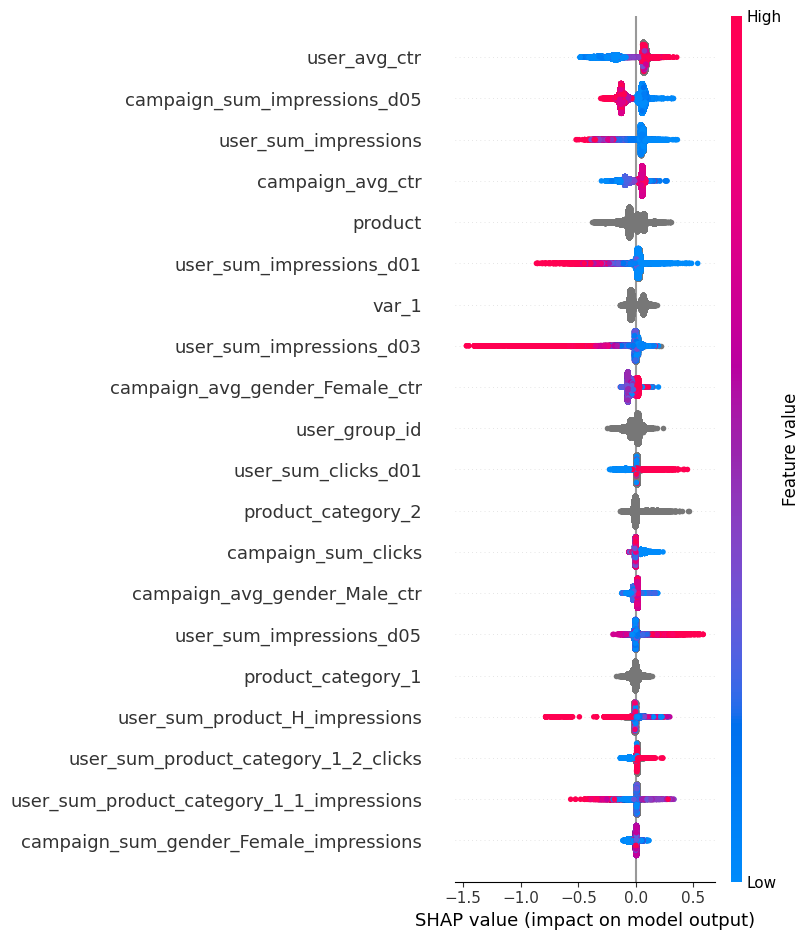

In [ ]:
shap.summary_plot(shap_values, X_valid)

## Benchmark

In [ ]:
pdf2x_train, pdf2x_test = train_test_split_out_of_time(pdf0x_train, "date", 0.8)
pdf2x_train, pdf2x_valid = train_test_split_out_of_time(pdf2x_train, "date", 0.8)

In [ ]:
pdf2x_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,date,features_date
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,2017-07-02,2017-07-01
17,2927,2017-07-02 00:03,295456,I,404347,53587,1,146115.0,9.0,Female,3.0,3.0,3.0,1,0,2017-07-02,2017-07-01
16,515635,2017-07-02 00:03,864110,H,405490,60305,3,NaN,2.0,Male,2.0,3.0,4.0,1,0,2017-07-02,2017-07-01
15,191223,2017-07-02 00:03,312475,C,359520,13787,4,NaN,2.0,Male,2.0,3.0,4.0,1,0,2017-07-02,2017-07-01
39522,509943,2017-07-02 13:43,466113,H,405490,60305,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,2017-07-02,2017-07-01


In [ ]:
X_train_2x, y_train_2x = pdf2x_train.drop(columns=drop_cols), pdf2x_train[target_col]

In [ ]:
X_valid_2x, y_valid_2x = pdf2x_valid.drop(columns=drop_cols), pdf2x_valid[target_col]

In [ ]:
X_test_2x, y_test_2x = pdf2x_test.drop(columns=drop_cols), pdf2x_test[target_col]

In [ ]:
for c in categorical_features:
  X_train_2x[c] = X_train_2x[c].astype('category')

for c in categorical_features:
  X_valid_2x[c] = X_valid_2x[c].astype('category')

for c in categorical_features:
  X_test_2x[c] = X_test_2x[c].astype('category')

In [ ]:
lgb_train_2x = lgb.Dataset(
    X_train_2x, y_train_2x,
    categorical_feature=categorical_features,
    free_raw_data=False,
)

lgb_valid_2x = lgb.Dataset(
    X_valid_2x, y_valid_2x,
    categorical_feature=categorical_features,
    free_raw_data=False,
    reference=lgb_train_2x,
)

In [ ]:
model_2x = lgb.train(
    params,
    train_set=lgb_train_2x,
    valid_sets=[lgb_train_2x, lgb_valid_2x],
    callbacks=[
        lgb.early_stopping(100, first_metric_only=True),
        lgb.log_evaluation(50, show_stdv=True)
    ]
)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 17216, number of negative: 216294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 233510, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073727 -> initscore=-2.530799
[LightGBM] [Info] Start training from score -2.530799
Training until validation scores don't improve for 200 rounds
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	training's auc: 0.594425	training's binary_logloss: 0.259594	valid_1's auc: 0.541547	valid_1's binary_logloss: 0.23012
[LightGBM] [Warning] No further splits with p

In [ ]:
y_test_pred_2x = model_2x.predict(X_test_2x)

roc_auc_score(y_true=y_test_2x, y_score=y_test_pred_2x)

0.5392179332332112